In [20]:
import os
import sys
import numpy as np
import pandas as pd
parent_directory = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
print('parent', parent_directory)
sys.path.append(parent_directory)
print(sys.path)


parent /Users/kathryn/Projects/Advanced-ML/project/climate-conversations
['/Users/kathryn/Projects/Advanced-ML/project/climate-conversations/project/analysis', '/Library/Frameworks/Python.framework/Versions/3.11/lib/python311.zip', '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11', '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/lib-dynload', '', '/Users/kathryn/Library/Caches/pypoetry/virtualenvs/climate-conversations-6VzO6URo-py3.11/lib/python3.11/site-packages', '/Users/kathryn/Projects/Advanced-ML/project/climate-conversations', '/Users/kathryn/Projects/Advanced-ML/project/climate-conversations', '/Users/kathryn/Projects/Advanced-ML/project/climate-conversations', '/Users/kathryn/Projects/Advanced-ML/project/climate-conversations/project/analysis', '/Users/kathryn/Projects/Advanced-ML/project/climate-conversations', '/Users/kathryn/Projects/Advanced-ML/project/climate-conversations/project/analysis', '/Users/kathryn/Projects/Advanced-ML/project/

#### Read in the Reddit Data

In [2]:
parent_directory = os.path.abspath(os.path.join(os.getcwd(), '..'))
print(parent_directory)
directory = os.path.join(parent_directory,'data_collection/project_data/')
print(directory)
full_df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith(".pkl"):
        file_path = os.path.join(directory, filename)
        df = pd.read_pickle(file_path)

        print(f"Data from {filename}:")
        #print(df.head())

        full_df = pd.concat([full_df, df], ignore_index=True)

print("Combined DataFrame:")
print(full_df)

/Users/kathryn/Projects/Advanced-ML/project/climate-conversations/project
/Users/kathryn/Projects/Advanced-ML/project/climate-conversations/project/data_collection/project_data/
Data from result_climateoffensive_None_None_None_None.pkl:
Data from result_climate_None_None_None_None.pkl:
Data from result_environment_None_None_None_None.pkl:
Data from result_climateskeptics_None_None_None_None.pkl:
Data from result_climatechange_None_None_None_None.pkl:
Combined DataFrame:
            id         subreddit  \
0      iqkeli8  climateoffensive   
1      iqknoj6  climateoffensive   
2      iqknu4e  climateoffensive   
3      iqkol75  climateoffensive   
4      iqkp1b2  climateoffensive   
...        ...               ...   
61504  iqkb5hk     climatechange   
61505  iqkb70u     climatechange   
61506  iqkb9vk     climatechange   
61507  iqkbkw7     climatechange   
61508  iqkd2dx     climatechange   

                                                    body             author  \
0      No, I 

In [3]:
full_df

,id,subreddit,body,author,score,gilded,created_utc,parent_id,link_id,retrieved_on,...,AuthorityVice,AuthorityVirtue,FairnessVice,FairnessVirtue,HarmVice,HarmVirtue,IngroupVice,IngroupVirtue,PurityVice,PurityVirtue
0,iqkeli8,climateoffensive,"No, I think most people just silence their pho...",halfanothersdozen,10,0,1664582862,iqka8ek,xs6p6m,1664960539,...,0.334976,0.364131,0.301360,0.389944,0.382774,0.459000,0.330429,0.384259,0.348129,0.331132
1,iqknoj6,climateoffensive,Google murray bookchin,skilled_cosmicist,5,0,1664587422,iqjaijq,xs6p6m,1664960259,...,0.262513,0.300236,0.000000,0.310173,0.296188,0.336714,0.322172,0.301826,0.287511,0.288809
2,iqknu4e,climateoffensive,Don’t listen to the haters on this thread. You...,1jx,1,0,1664587502,xs6p6m,xs6p6m,1664960254,...,0.322893,0.370959,0.309061,0.402851,0.377397,0.456825,0.330840,0.388593,0.346233,0.340704
3,iqkol75,climateoffensive,"Despite other comments, this is really smart.\...",slycrane,5,0,1664587890,xs6p6m,xs6p6m,1664960230,...,0.327088,0.367177,0.311331,0.397833,0.380398,0.452330,0.349217,0.379215,0.344354,0.332868
4,iqkp1b2,climateoffensive,Those two examples are normalizing seatbelts a...,slycrane,4,0,1664588125,iqjc5az,xs6p6m,1664960217,...,0.328848,0.377917,0.305647,0.410593,0.394757,0.456351,0.345481,0.384914,0.345532,0.333362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61504,iqkb5hk,climatechange,It doesn't matter when they *evolved*. They ar...,danopinyon,2,0,1664581174,iqk4tyy,xsdl50,1664960644,...,0.322012,0.349014,0.305045,0.376533,0.337003,0.394277,0.333913,0.352162,0.327931,0.311568
61505,iqkb70u,climatechange,Antarctica has only been frozen 2 million year...,outrageousirish,0,0,1664581196,iqk7jpp,xsdl50,1664960643,...,0.325890,0.390184,0.299367,0.395887,0.378872,0.474520,0.355795,0.391705,0.334660,0.346911
61506,iqkb9vk,climatechange,These are old industry talking points that I'm...,danopinyon,1,0,1664581233,iqk4irh,xsdl50,1664960640,...,0.349207,0.393157,0.299221,0.418834,0.385559,0.508195,0.339977,0.406416,0.347156,0.338604
61507,iqkbkw7,climatechange,What about the artificial 1000ppm CO2 and high...,newybluey,3,0,1664581381,iqk2mu5,xsdl50,1664960631,...,0.321725,0.339828,0.297534,0.347103,0.343716,0.378796,0.326861,0.352744,0.316298,0.319941


In [4]:
full_df['Harm_Care_Agg'] = (full_df['HarmVice'] + full_df['HarmVirtue']) / 2
full_df['Authority_Agg'] = (full_df['AuthorityVice'] + full_df['HarmVirtue']) / 2
full_df['Purity_Agg'] = (full_df['PurityVice'] + full_df['PurityVirtue']) / 2
full_df['Fairness_Agg'] = (full_df['FairnessVice'] + full_df['FairnessVirtue']) / 2
full_df['Ingroup_Agg'] = (full_df['IngroupVice'] + full_df['IngroupVirtue']) / 2

In [5]:
full_df.columns

Index(['id', 'subreddit', 'body', 'author', 'score', 'gilded', 'created_utc',
       'parent_id', 'link_id', 'retrieved_on', 'controversiality',
       'is_submitter', 'tokenized_body_sents', 'tokenized_body_words',
       'tokenized_body_words_norm', 'AuthorityVice', 'AuthorityVirtue',
       'FairnessVice', 'FairnessVirtue', 'HarmVice', 'HarmVirtue',
       'IngroupVice', 'IngroupVirtue', 'PurityVice', 'PurityVirtue',
       'Harm_Care_Agg', 'Authority_Agg', 'Purity_Agg', 'Fairness_Agg',
       'Ingroup_Agg'],
      dtype='object')

In [6]:

# Group by 'subreddit' and calculate the mean for each moral foundation
average_df = full_df.groupby('subreddit')[['HarmVirtue',
       'AuthorityVirtue', 'PurityVirtue', 'HarmVice', 'PurityVice',
       'IngroupVice', 'FairnessVirtue',
       'FairnessVice', 'IngroupVirtue', 'AuthorityVice']].mean().reset_index()

# Print the resulting DataFrame
print(average_df)


          subreddit  HarmVirtue  AuthorityVirtue  PurityVirtue  HarmVice  \
0           climate    0.433998         0.352476      0.322121  0.360926   
1     climatechange    0.431733         0.352209      0.321683  0.359761   
2  climateoffensive    0.435262         0.353962      0.322471  0.360948   
3   climateskeptics    0.433033         0.354083      0.324601  0.361769   
4       environment    0.438910         0.354991      0.324385  0.365437   

   PurityVice  IngroupVice  FairnessVirtue  FairnessVice  IngroupVirtue  \
0    0.328580     0.330991        0.376875      0.294605       0.360458   
1    0.328086     0.330957        0.375829      0.296186       0.360218   
2    0.328928     0.332257        0.376623      0.293299       0.362510   
3    0.330400     0.333237        0.378032      0.300657       0.361864   
4    0.332951     0.331109        0.379874      0.296782       0.363969   

   AuthorityVice  
0       0.313425  
1       0.313394  
2       0.314724  
3       0.316646

In [7]:
full_df['Dominant_Moral_Foundation'] = full_df[['HarmVirtue', 'AuthorityVirtue', 'PurityVirtue', 'HarmVice', 'PurityVice', 'IngroupVice', 'FairnessVirtue', 'FairnessVice', 'IngroupVirtue', 'AuthorityVice']].idxmax(axis=1)

In [8]:
full_df.sort_values(by = 'Harm_Care_Agg', ascending = False)

,id,subreddit,body,author,score,gilded,created_utc,parent_id,link_id,retrieved_on,...,IngroupVice,IngroupVirtue,PurityVice,PurityVirtue,Harm_Care_Agg,Authority_Agg,Purity_Agg,Fairness_Agg,Ingroup_Agg,Dominant_Moral_Foundation
46625,iqk41gh,environment,How do they know?,jsm0520,2,0,1664577740,xry8cj,xry8cj,1664960864,...,0.366881,0.454767,0.381617,0.353506,0.54346,0.48628,0.367561,0.389501,0.410824,HarmVirtue
17288,iruf8xn,environment,We've always known.,therealmrbrownstone,303,0,1665456826,iru44os,y0v5kh,1667964453,...,0.366881,0.454767,0.381617,0.353506,0.54346,0.48628,0.367561,0.389501,0.410824,HarmVirtue
61438,iqgx3g3,climatechange,What do you know?,twirlysocrates,1,0,1664519827,iqfve3g,xqq3j2,1664964450,...,0.366881,0.454767,0.381617,0.353506,0.54346,0.48628,0.367561,0.389501,0.410824,HarmVirtue
54208,iplnr2q,climateskeptics,And you know this how?,anno2122,0,0,1663943966,ipj8yds,xl982b,1665001301,...,0.366881,0.454767,0.381617,0.353506,0.54346,0.48628,0.367561,0.389501,0.410824,HarmVirtue
17678,irx2obn,environment,we been known,hautbois42069,1,0,1665511412,y0v5kh,y0v5kh,1667961618,...,0.366881,0.454767,0.381617,0.353506,0.54346,0.48628,0.367561,0.389501,0.410824,HarmVirtue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40931,iphhcnv,environment,https://www.nbcnews.com/politics/politics-news...,thorndike,1,0,1663863346,iphdv0p,xjkc7i,1665006269,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,HarmVirtue
1086,ip49hdy,climateoffensive,https://www.youtube.com/watch?v=iCRDseUEEsg,adept_contact,1,0,1663623819,ip49dn2,xikoom,1665021332,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,HarmVirtue
2522,iri24ro,climate,🤣😭😂🤣🤣,diligent-donkey-9556,-7,0,1665223182,iri1qpc,xynrq3,1667977583,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,HarmVirtue
26436,imro87d,environment,Bologna.,cwallace98,2,0,1662103130,imqxj73,x3ejlz,1665123940,...,0.000000,0.000000,0.000000,0.265957,0.00000,0.00000,0.132979,0.000000,0.000000,PurityVirtue


In [9]:
# Group by 'subreddit' and calculate the mean for each moral foundation
average_df = full_df.groupby('subreddit')[['Harm_Care_Agg',
       'Authority_Agg', 'Purity_Agg', 'Fairness_Agg', 'Ingroup_Agg']].mean().reset_index()

# Print the resulting DataFrame
print(average_df)

          subreddit  Harm_Care_Agg  Authority_Agg  Purity_Agg  Fairness_Agg  \
0           climate       0.397462       0.373711    0.325351      0.335740   
1     climatechange       0.395747       0.372564    0.324885      0.336007   
2  climateoffensive       0.398105       0.374993    0.325700      0.334961   
3   climateskeptics       0.397401       0.374839    0.327501      0.339345   
4       environment       0.402173       0.378102    0.328668      0.338328   

   Ingroup_Agg  
0     0.345725  
1     0.345588  
2     0.347384  
3     0.347550  
4     0.347539  


In [10]:
filtered_df = full_df[full_df['body'].str.len() > 50]

## i think this is the best one so far

In [11]:
# Group by 'subreddit' and calculate the mean for each moral foundation
average_df = filtered_df.groupby('subreddit')[['HarmVirtue',
       'AuthorityVirtue', 'PurityVirtue', 'HarmVice', 'PurityVice',
       'IngroupVice', 'FairnessVirtue',
       'FairnessVice', 'IngroupVirtue', 'AuthorityVice']].mean().reset_index()

# Print the resulting DataFrame
print(average_df)

          subreddit  HarmVirtue  AuthorityVirtue  PurityVirtue  HarmVice  \
0           climate    0.441423         0.360309      0.329146  0.369603   
1     climatechange    0.435546         0.357402      0.326640  0.365256   
2  climateoffensive    0.441433         0.360666      0.327794  0.368886   
3   climateskeptics    0.434780         0.357176      0.327010  0.364944   
4       environment    0.444742         0.361601      0.330038  0.372467   

   PurityVice  IngroupVice  FairnessVirtue  FairnessVice  IngroupVirtue  \
0    0.335609     0.341394        0.384248      0.304127       0.368538   
1    0.333057     0.337931        0.380737      0.303066       0.365369   
2    0.334803     0.339963        0.383478      0.303078       0.369152   
3    0.333228     0.337525        0.380574      0.304878       0.364874   
4    0.338740     0.340311        0.385841      0.305043       0.370533   

   AuthorityVice  
0       0.322627  
1       0.319417  
2       0.321644  
3       0.320313

In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = full_df

# Separate numeric and non-numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
non_numeric_df = df.select_dtypes(exclude=['int64', 'float64'])

# Initialize and apply scaler to numeric columns
scaler = MinMaxScaler()
scaled_numeric_data = scaler.fit_transform(numeric_df)
scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_df.columns)

# Concatenate scaled numeric columns back with non-numeric columns
final_scaled_df = pd.concat([scaled_numeric_df, non_numeric_df], axis=1)

# Display the final DataFrame
print(final_scaled_df)

          score  gilded  created_utc  retrieved_on  controversiality  \
0      0.254755     0.0     0.585968      0.000768               0.0   
1      0.252543     0.0     0.587034      0.000676               0.0   
2      0.250774     0.0     0.587053      0.000675               0.0   
3      0.252543     0.0     0.587144      0.000667               0.0   
4      0.252101     0.0     0.587199      0.000663               0.0   
...         ...     ...          ...           ...               ...   
61504  0.251216     0.0     0.585573      0.000802               0.0   
61505  0.250332     0.0     0.585579      0.000802               0.0   
61506  0.250774     0.0     0.585587      0.000801               0.0   
61507  0.251659     0.0     0.585622      0.000798               0.0   
61508  0.250332     0.0     0.585791      0.000783               0.0   

       AuthorityVice  AuthorityVirtue  FairnessVice  FairnessVirtue  HarmVice  \
0           0.644836         0.755801      0.560018   

In [13]:
# Group by 'subreddit' and calculate the mean for each moral foundation
average_df = final_scaled_df.groupby('subreddit')[['HarmVirtue',
       'AuthorityVirtue', 'PurityVirtue', 'HarmVice', 'PurityVice',
       'IngroupVice', 'FairnessVirtue',
       'FairnessVice', 'IngroupVirtue', 'AuthorityVice']].mean().reset_index()

# Print the resulting DataFrame
print(average_df)

          subreddit  HarmVirtue  AuthorityVirtue  PurityVirtue  HarmVice  \
0           climate    0.690253         0.731609      0.592281  0.658415   
1     climatechange    0.686651         0.731055      0.591475  0.656290   
2  climateoffensive    0.692263         0.734694      0.592924  0.658456   
3   climateskeptics    0.688718         0.734946      0.596841  0.659952   
4       environment    0.698065         0.736829      0.596443  0.666644   

   PurityVice  IngroupVice  FairnessVirtue  FairnessVice  IngroupVirtue  \
0    0.590368     0.500797        0.699431      0.547464       0.737964   
1    0.589480     0.500746        0.697488      0.550402       0.737471   
2    0.590993     0.502712        0.698963      0.545037       0.742165   
3    0.593638     0.504194        0.701578      0.558711       0.740841   
4    0.598222     0.500975        0.704996      0.551511       0.745151   

   AuthorityVice  
0       0.603349  
1       0.603290  
2       0.605849  
3       0.609550

In [14]:
# Group by 'subreddit' and calculate the mean for each moral foundation
average_df = final_scaled_df.groupby('subreddit')[['Harm_Care_Agg',
       'Authority_Agg', 'Purity_Agg', 'Fairness_Agg', 'Ingroup_Agg']].mean().reset_index()

# Print the resulting DataFrame
print(average_df)

          subreddit  Harm_Care_Agg  Authority_Agg  Purity_Agg  Fairness_Agg  \
0           climate       0.731355       0.743837    0.731468      0.747476   
1     climatechange       0.728200       0.741553    0.730420      0.748071   
2  climateoffensive       0.732538       0.746388    0.732252      0.745742   
3   climateskeptics       0.731242       0.746083    0.736301      0.755501   
4       environment       0.740025       0.752576    0.738926      0.753238   

   Ingroup_Agg  
0     0.736997  
1     0.736705  
2     0.740533  
3     0.740889  
4     0.740864  


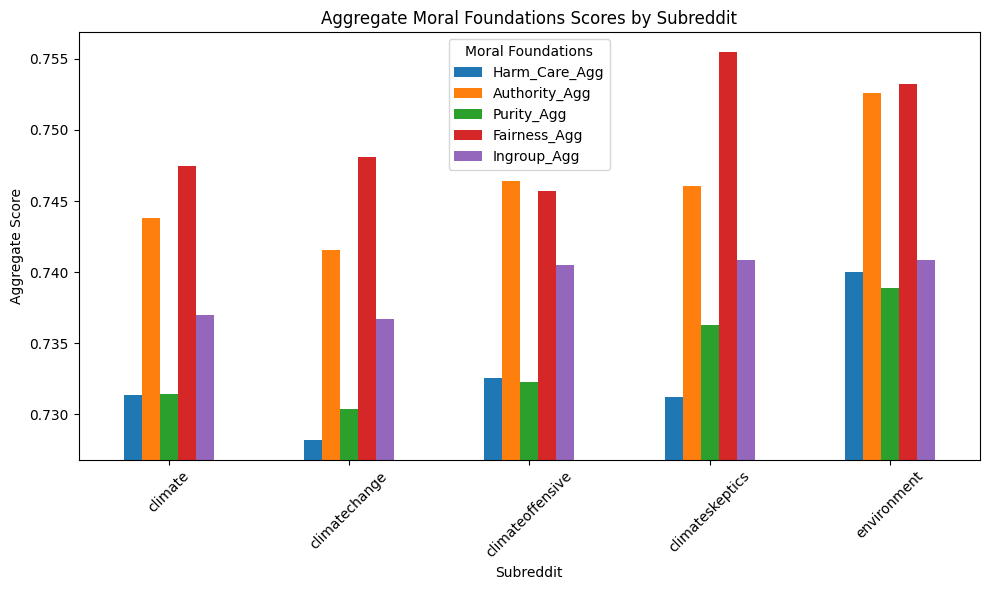

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
# Identifying the range of the aggregate scores to adjust the y-axis dynamically
min_score = average_df[['Harm_Care_Agg', 'Authority_Agg', 'Purity_Agg', 'Fairness_Agg', 'Ingroup_Agg']].min().min()
max_score = average_df[['Harm_Care_Agg', 'Authority_Agg', 'Purity_Agg', 'Fairness_Agg', 'Ingroup_Agg']].max().max()

# Adding a small buffer to min and max values for visual clarity
buffer = (max_score - min_score) * 0.05
y_min = max(0, min_score - buffer)  # Ensuring y_min doesn't go below 0
y_max = max_score + buffer

# Plotting with dynamic y-axis limits
average_df.set_index('subreddit').plot(kind='bar', figsize=(10, 6))
plt.title('Aggregate Moral Foundations Scores by Subreddit')
plt.ylabel('Aggregate Score')
plt.xlabel('Subreddit')
plt.xticks(rotation=45)
plt.ylim(y_min, y_max)
plt.legend(title='Moral Foundations')
plt.tight_layout()

plt.show()